In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip uninstall pyspark

In [ ]:
!pip install pyspark #installing PySpark

     |████████████████████████████████| 212.4 MB 68 kB/s 
     |████████████████████████████████| 198 kB 47.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=e647c238668fe2b430ce79bfb69e1d6eec088dc471a233a9e224ea3997585b7e
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
#importing important libraries
import tweepy
from tweepy import API
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
#Credentials
consumer_key = 'gIyZHi7I3ghgxzKcRv6wHSPS8'
consumer_secret	= 'z3xig9sHx8Xfz0ovgegpB5ZVClYEPCjYnoddfQClDQnwv8QiB0'
access_token =	'3108515654-gZw78HtJvLJPT4vbP8dqsP6yJoes6pHPPG1KUgi'
access_token_secret	= 'ATSUt0DqQCo8CnbBUNeY1T8iJhGlOpxIEvGmHYjQRgU02'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
for tweet in api.search('Stocks','Bitcoin', 'invest'): #Keywords for fetching tweets
  print(tweet)

In [ ]:
for tweet in api.search('Stocks','Bitcoin', 'invest'): #Keywords for fetching tweets
  print(tweet.text)

In [ ]:
df = pd.DataFrame(columns = ['Tweets', 'Tweet_id','User', 'User_id', 'User_statuses_count', 'User_followers', 'User_friends_count', 'User_location', 'fav_count', 'rt_count', 'tweet_date', 'User_verified'])

In [ ]:
def stream(data, file_name):
  i = 0
  for tweet in tweepy.Cursor(api.search, q=data, count = 100, lang = 'en').items():
    print(i, end='\r')
    df.loc[i, 'Tweets'] = tweet.text
    df.loc[i, 'Tweet_id'] = tweet.id
    df.loc[i, 'User'] = tweet.user.name
    df.loc[i, 'User_id'] = tweet.user.id
    df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
    df.loc[i, 'User_followers'] = tweet.user.followers_count
    df.loc[i, 'User_friends_count'] = tweet.user.friends_count
    df.loc[i, 'User_location'] = tweet.user.location
    df.loc[i, 'fav_count'] = tweet.favorite_count
    df.loc[i, 'rt_count'] = tweet.retweet_count
    df.loc[i, 'tweet_date'] = tweet.created_at
    df.loc[i, 'User_verified'] = tweet.user.verified
    df.to_csv('{}.csv'.format(file_name))
    i+=1
    if i == 10000:
      break
    else:
      pass

In [ ]:
stream(data = ['Stocks'], file_name = 'twitterData_10K') #Saving the data in CSV

In [ ]:
df.head() #printing top 5 tweets

,Tweets,Tweet_id,User,User_id,User_statuses_count,User_followers,User_friends_count,User_location,fav_count,rt_count,tweet_date,User_verified
0,I wish pro stocks ran first,1444780647306891264,Cory Caz,93458633,35422,1117,475,"Stafford Springs, CT",0,0,2021-10-03 21:45:23,False
1,RT @Ardadex_finance: Ardadex Protocol Launch T...,1444780625827745795,Alesia Climpson,1381256689161277441,117,179,239,,0,10443,2021-10-03 21:45:18,False
2,Invest in yourself today!\n\nGrow your stocks ...,1444780622900338694,Midnight Underdog 🐺,1255649265717841926,48258,29123,368,Make $100+ daily on Twitter 👇,0,0,2021-10-03 21:45:17,False
3,RT @Malcolm_Bart: Win Nov canola up A$8.33/t &...,1444780604277477376,AvantAgri,1962282600,4137,608,636,Australia,0,1,2021-10-03 21:45:13,False
4,RT @Mercurial_Hg: Salah stocks been rising sin...,1444780577966673920,Justice,1326408658499022848,69616,996,505,Lost,0,2,2021-10-03 21:45:07,False


In [ ]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#cleaning data
import re 
def clean_tweet(tweet): 
  soup = BeautifulSoup(tweet, 'lxml') # removing HTML entities such as ‘&amp’,’&quot’,'&gt'; lxml is the html parser and shoulp be installed using 'pip install lxml'
  souped = soup.get_text()

  return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|(https?:\/\/.*[\r\n]*)', ' ', tweet).split())

In [ ]:
#analysing sentiments and assigning polarity
def analyze_sentiment(tweet):
  analysis = TextBlob(tweet)
  if analysis.sentiment.polarity > 0:
    return '1'
  elif analysis.sentiment.polarity == 0:
    return '0'
  else:
    return '2'

In [ ]:
df['clean_tweet'] = df['Tweets'].apply(lambda x: clean_tweet(x))
df['Sentiment'] = df['clean_tweet'].apply(lambda x: analyze_sentiment(x))

In [ ]:
#Taking sample for checking polarity
n = 3
print('Original tweet: \n' + df['Tweets'][n])
print()
print('Clean tweet: \n' + df['clean_tweet'][n])
print()
print('Sentiment: \n' + df['Sentiment'][n])

Original tweet: 
RT @Malcolm_Bart: Win Nov canola up A$8.33/t &amp; EU rape up A$5.35. Both bucked the decline in US soybns triggered by larger than expected st…

Clean tweet: 
RT Bart Win Nov canola up A 8 33 t amp EU rape up A 5 35 Both bucked the decline in US soybns triggered by larger than expected st

Sentiment: 
1


In [ ]:
#printing total sentiments in each polarity
print(df['Sentiment'].unique())
df['Sentiment'] = df['Sentiment'].astype(int)
print(df['Sentiment'].unique())
print(df['Sentiment'].value_counts())

['1' '0' '2']
[1 0 2]
1    4827
0    4172
2    1001
Name: Sentiment, dtype: int64


In [ ]:
all_tweets = ''.join(tweet for tweet in df['clean_tweet'])
wordcloud = WordCloud(stopwords = STOPWORDS).generate(all_tweets)

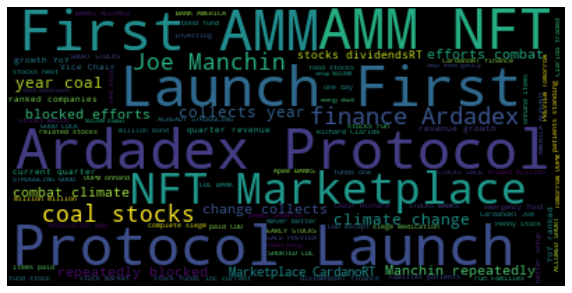

In [ ]:
#Creating WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show() 

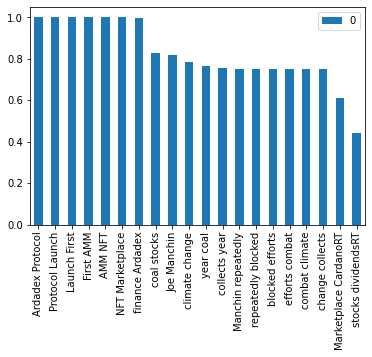

In [ ]:
#creating graph for top words used
df_freq = pd.DataFrame.from_dict(data = wordcloud.words_, orient='index')
df_freq = df_freq.head(20)
df_freq.plot.bar()

In [ ]:
df.info() #printing datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tweets               10000 non-null  object
 1   Tweet_id             10000 non-null  object
 2   User                 10000 non-null  object
 3   User_id              10000 non-null  object
 4   User_statuses_count  10000 non-null  object
 5   User_followers       10000 non-null  object
 6   User_friends_count   10000 non-null  object
 7   User_location        10000 non-null  object
 8   fav_count            10000 non-null  object
 9   rt_count             10000 non-null  object
 10  tweet_date           10000 non-null  object
 11  User_verified        10000 non-null  object
 12  clean_tweet          10000 non-null  object
 13  Sentiment            10000 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


In [ ]:
print(df['User_location'].unique()) 

['Stafford Springs, CT' '' 'Make $100+ daily on Twitter 👇' ...
 'Southern Wisconsin' 'Delhi ' '100% Free Guide  👉🏼']


In [ ]:
#Changing data types to integer
df['User_statuses_count'] = df['User_statuses_count'].astype(int)
df['User_followers'] = df['User_followers'].astype(int)
df['User_friends_count'] = df['User_friends_count'].astype(int)
df['rt_count'] = df['rt_count'].astype(int)
df['fav_count'] = df['fav_count'].astype(int)
df['tweet_date_mod'] = pd.to_datetime(df['tweet_date'], format='[%d/%b/%y:%H:%M:%S]')
df = df.drop(['tweet_date'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Tweets               10000 non-null  object        
 1   Tweet_id             10000 non-null  object        
 2   User                 10000 non-null  object        
 3   User_id              10000 non-null  object        
 4   User_statuses_count  10000 non-null  int64         
 5   User_followers       10000 non-null  int64         
 6   User_friends_count   10000 non-null  int64         
 7   User_location        10000 non-null  object        
 8   fav_count            10000 non-null  int64         
 9   rt_count             10000 non-null  int64         
 10  User_verified        10000 non-null  object        
 11  clean_tweet          10000 non-null  object        
 12  Sentiment            10000 non-null  object        
 13  tweet_date_mod       10000 non-n

In [ ]:
print(df['User_statuses_count'].unique())
print(df['User_statuses_count'].value_counts())

[ 35422    117  48258 ...   8045 141348 175134]
100602    60
42587     40
108       34
100603    31
3184      29
          ..
131019     1
40911      1
4708       1
32723      1
75781      1
Name: User_statuses_count, Length: 6013, dtype: int64


In [ ]:
print(df['fav_count'].unique())
print(df['fav_count'].value_counts())

[   0    2    5    1    4  162    3   12   48   13    9    6   70   32
   30    8   15   26   11   24   10   53    7   54   19  205  505   20
   44  238   45   14  383   18   31  131  109   39   27   16   51  691
   76   25  541   80   17   52   78   59   22   77   29   23   71  302
  110   28   82  116   60   43   49  143  182  114   46   40   81   36
  134   42   56   34  281   55 1001]
0      8500
1       716
2       242
3       121
4        83
       ... 
78        1
162       1
45        1
42        1
383       1
Name: fav_count, Length: 77, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


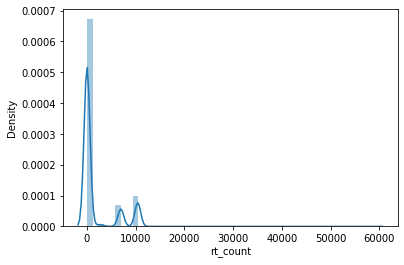

In [ ]:
#Creating graph for retweet counts
import seaborn as sns
dg = sns.distplot(df['rt_count'].dropna())
plt.show()

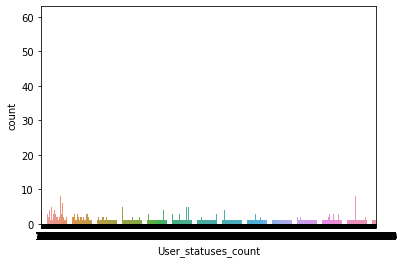

In [ ]:
#Creating graph for user_statuses counts
dg = sns.countplot(data = df, x='User_statuses_count')
plt.show()

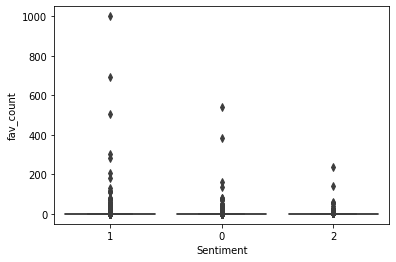

In [ ]:
ax = sns.boxplot(x= "Sentiment", y="fav_count", data = df)
plt.show()

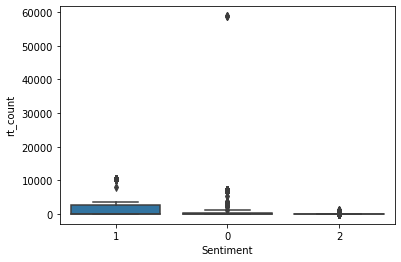

In [ ]:
ax = sns.boxplot(x= "Sentiment", y="rt_count", data = df)
plt.show()

In [ ]:
#importing pyspark modules
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import HashingTF, Tokenizer, StopWordsRemover

#creating pyspark session
appName = "Sentiment analysis in spark"
spark = SparkSession \
      .builder \
      .appName(appName) \
      .config("spark.some.config.option", "some-value")\
      .getOrCreate()

In [ ]:
tweets_csv = spark.createDataFrame(df)
tweets_csv.printSchema()
tweets_csv.show(truncate=False, n=5)

root
 |-- Tweets: string (nullable = true)
 |-- Tweet_id: long (nullable = true)
 |-- User: string (nullable = true)
 |-- User_id: long (nullable = true)
 |-- User_statuses_count: long (nullable = true)
 |-- User_followers: long (nullable = true)
 |-- User_friends_count: long (nullable = true)
 |-- User_location: string (nullable = true)
 |-- fav_count: long (nullable = true)
 |-- rt_count: long (nullable = true)
 |-- User_verified: boolean (nullable = true)
 |-- clean_tweet: string (nullable = true)
 |-- Sentiment: string (nullable = true)
 |-- tweet_date_mod: timestamp (nullable = true)

+------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+--------------------+-------------------+-------------------+--------------+------------------+------------------------------+---------+--------+-------------+------------------------------------------------------------------------------

In [ ]:
tweets_csv.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Tweets,10000,None,None,"""As we approach a stagflationary regime....Lar...",🚨🚨🚨🚨🚨🚨🚨🚨\n\nU.S. Federal Reserve Vice Chair Ri...
Tweet_id,10000,1.44472086443071309E18,3.0940946449886555E13,1444674145740984325,1444780647306891264
User,10000,21197.0,29729.09272076765,"""Remember to Love Each Other"" Cooney",🫁 ً
User_id,10000,7.6068823164840653E17,6.2050843260420941E17,10202,1444757405183746050
User_statuses_count,10000,46086.4878,177622.07724013444,1,2632024
User_followers,10000,13482.0533,434773.4962635997,0,25861978
User_friends_count,10000,1442.5172,9668.87509437698,0,443347
User_location,10000,9790.115571428572,9577.465418651018,,🪙
fav_count,10000,1.2315,16.616290737158725,0,1001


In [ ]:
#selecting clean_tweets and sentimentLabel variables
data = tweets_csv.select("clean_tweet", col("Sentiment").cast("int").alias("label"))
data.show(truncate = False, n=10)

+----------------------------------------------------------------------------------------------------------------------------------+-----+
|clean_tweet                                                                                                                       |label|
+----------------------------------------------------------------------------------------------------------------------------------+-----+
|I wish pro stocks ran first                                                                                                       |1    |
|RT finance Ardadex Protocol Launch The First AMM and NFT Marketplace on Cardano                                                   |1    |
|Invest in yourself today Grow your stocks and investments at a rapid pace                                                         |0    |
|RT Bart Win Nov canola up A 8 33 t amp EU rape up A 5 35 Both bucked the decline in US soybns triggered by larger than expected st|1    |
|RT Hg Salah stocks been ri

In [ ]:
#dividing 70% train data and 30% test data set
dividedData = data.randomSplit([0.7, 0.3])
trainingData = dividedData[0] #index 0 = training data
testingData = dividedData[1] #index 1 = testing data
train_rows = trainingData.count()
test_rows = testingData.count()
print("Training data rows ", train_rows, "; Testing data rows:", test_rows)

Training data rows  6892 ; Testing data rows: 3108


In [ ]:
#tokenizing data
tokenizer = Tokenizer(inputCol="clean_tweet", outputCol="SentimentWords")
tokenizedTrain = tokenizer.transform(trainingData)
tokenizedTrain.show(truncate= False)

+--------------------------------------------------------------------------------------------------------------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------+
|clean_tweet                                                                                                         |label|SentimentWords                                                                                                                                |
+--------------------------------------------------------------------------------------------------------------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                    |0    |[]                                                                      

In [ ]:
#removing stop words
swr = StopWordsRemover(inputCol=tokenizer.getOutputCol(),
                       outputCol="MeaningfulWords")
swRemovedTrain = swr.transform(tokenizedTrain)
swRemovedTrain.show(truncate=False)

+--------------------------------------------------------------------------------------------------------------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------+
|clean_tweet                                                                                                         |label|SentimentWords                                                                                                                                |MeaningfulWords                                                                                     |
+--------------------------------------------------------------------------------------------------------------------+-----+------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#hashing
hashTF = HashingTF(inputCol=swr.getOutputCol(), outputCol="features")
numericTrainData = hashTF.transform(swRemovedTrain).select(
    'label', 'MeaningfulWords', 'features')
numericTrainData.show(truncate = False, n = 15)

+-----+----------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                                     |features                                                                                                                                                          |
+-----+----------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[]                                                                                                  |(262144,[249180],[1.0])                                                     

In [ ]:
#Logistic regression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10, regParam=0.01, elasticNetParam=0.8)
model = lr.fit(numericTrainData)
print("trainig is done")

trainig is done


In [ ]:
tokenizedTest = tokenizer.transform(testingData)
SwRemovedTest = swr.transform(tokenizedTest)
numericTest = hashTF.transform(SwRemovedTest).select(
    'label', 'MeaningfulWords', 'features')
numericTest.show(truncate= False, n=15)

+-----+----------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|MeaningfulWords                                                                                                             |features                                                                                                                                                                                                                |
+-----+----------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
prediction = model.transform(numericTest)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol = 'prediction')
evaluator.evaluate(prediction)

0.9021352957114137

In [ ]:
PredictionFinal = prediction.select(
    "MeaningfulWords", "prediction", "label")
PredictionFinal.show(n = 20, truncate = False)
correctPrediction = PredictionFinal.filter(
    PredictionFinal['prediction'] == PredictionFinal['label']).count()
TotalData = PredictionFinal.count()
print("Correct prediction: ", correctPrediction, ", Total data:", TotalData,
      ", Accuracy:", correctPrediction/TotalData)

+----------------------------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                                             |prediction|label|
+----------------------------------------------------------------------------------------------------------------------------+----------+-----+
|[]                                                                                                                          |0.0       |0    |
|[]                                                                                                                          |0.0       |0    |
|[0w0, mean, serves, purpose, especially, securing, money, kinda, like, stocks, well, try, move]                             |2.0       |2    |
|[1, top, energy, stock, buy, october]                                                                                       |1.0       

In [ ]:
# from pyspark.ml import Pipeline
# from pyspark.ml.classification import GBTClassifier
# from pyspark.ml.feature import StringIndexer, VectorIndexer
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel").fit(numericTrainData)

# featureIndexer =\
#     VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=3).fit(numericTrainData)


In [ ]:
#Naive bayes model
from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes (smoothing = 1.0, modelType="multinomial")
model2 = nb.fit(numericTrainData)
print("Model is trained")

Model is trained


In [ ]:
prediction = model2.transform(numericTest)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(predictionCol = 'prediction')
evaluator.evaluate(prediction)

0.7892986627442949

In [ ]:
prediction = model2.transform(numericTest)
PredictionFinal2 = prediction.select(
    "MeaningfulWords", "prediction", "label")
PredictionFinal2.show(n = 20, truncate = False)
correctPrediction = PredictionFinal2.filter(
    PredictionFinal2['prediction'] == PredictionFinal2['label']).count()
TotalData = PredictionFinal2.count()
print("Correct prediction: ", correctPrediction, ", Total data:", TotalData,
      ", Accuracy:", correctPrediction/TotalData)

+----------------------------------------------------------------------------------------------------------------------------+----------+-----+
|MeaningfulWords                                                                                                             |prediction|label|
+----------------------------------------------------------------------------------------------------------------------------+----------+-----+
|[]                                                                                                                          |0.0       |0    |
|[]                                                                                                                          |0.0       |0    |
|[0w0, mean, serves, purpose, especially, securing, money, kinda, like, stocks, well, try, move]                             |1.0       |2    |
|[1, top, energy, stock, buy, october]                                                                                       |1.0       

In [ ]:
# # from pyspark.ml.classification import RandomForestClassifier

# rfc = RandomForestClassifier(numTrees=10, labelCol="label", featuresCol="features")
# model3 = rfc.fit(numericTrainData)
# print("model is traied")

In [ ]:
from pyspark.ml.clustering import LDA

lda = LDA(k=7, maxIter=10, featuresCol="features")
model = lda.fit(numericTest)

# A model with higher log-likelihood and lower perplexity is a good model
ll = model.logLikelihood(numericTest)
lp = model.logPerplexity(numericTest)
print("The lower bound on the log likelihood of the entire corpus: "+ str(ll))
print("The upper bound on perplexity: "+str(lp))

#describing topics
topics = model.describeTopics(7)
print("The topics described by their top weighted terms: ")
topics.show(truncate = True)

#show result
transformed = model.transform(numericTest)
print(transformed.show())
print(transformed.show(truncate=True))

The lower bound on the log likelihood of the entire corpus: -1612284.4404516667
The upper bound on perplexity: 43.118432831933745
The topics described by their top weighted terms: 
+-----+--------------------+--------------------+
|topic|         termIndices|         termWeights|
+-----+--------------------+--------------------+
|    0|[89427, 77407, 23...|[0.00188819502476...|
|    1|[239859, 89427, 7...|[5.29542933888536...|
|    2|[89427, 5381, 142...|[2.07905891216193...|
|    3|[89427, 258254, 5...|[1.66405325128538...|
|    4|[160395, 77407, 8...|[8.26990445972568...|
|    5|[77407, 118422, 1...|[3.87746248238338...|
|    6|[56938, 188835, 2...|[4.38767088198872...|
+-----+--------------------+--------------------+

+-----+--------------------+--------------------+--------------------+
|label|     MeaningfulWords|            features|   topicDistribution|
+-----+--------------------+--------------------+--------------------+
|    0|                  []|(262144,[249180],...|[0.602

In [ ]:
#printing top n words
topn_words = 10
num_topics = 7

topics = model.topicsMatrix().toArray()
for topic in range(num_topics):
  print("Topic "+ str(topic)+ ":")
  for word in range(0, topn_words):
    print(" "+str(topics[word][topic]))

Topic 0:
 0.7456221541966792
 0.7673273408085459
 0.7662994628077817
 0.6605346166644513
 0.8940916407930429
 0.7416636243055831
 0.786792309298098
 0.6991627064126038
 0.821037486893501
 0.9397801302787021
Topic 1:
 0.7439549296089599
 0.7585994045900365
 0.8699690662444324
 0.7301807943584774
 0.844375262587739
 0.8384370226098323
 0.682929456224838
 0.8423724258779653
 0.6830903282058937
 0.7854906656711155
Topic 2:
 0.7580753649077357
 0.8097022294644194
 0.8113864779141813
 0.7367949106623325
 0.8228869045494588
 0.8043335809740655
 0.8311013231070191
 0.8352143131567418
 0.6637285919316048
 0.8148421472439485
Topic 3:
 0.8226003470268701
 0.7460134518513011
 0.7746522853209596
 0.678869634478461
 0.8959998380097697
 0.7541429495619569
 0.6755150488097779
 0.7762059496055852
 0.7114270386203752
 0.7584585583366049
Topic 4:
 0.7535402391321803
 0.7421619066062453
 0.7864781860220357
 0.7308584268768279
 0.7029182373203069
 0.8211212908630596
 0.8197459781084979
 0.7720573620910871


In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

#definng assembler
assembler = VectorAssembler(inputCols = ['User_statuses_count', 'User_followers', 'User_friends_count'],
                            outputCol="features")
data = assembler.transform(tweets_csv).select('User', 'features')
data.show(truncate = False, n=3)
data.count()

+--------------------+-----------------------+
|User                |features               |
+--------------------+-----------------------+
|Cory Caz            |[35422.0,1117.0,475.0] |
|Alesia Climpson     |[117.0,179.0,239.0]    |
|Midnight Underdog 🐺|[48258.0,29123.0,368.0]|
+--------------------+-----------------------+
only showing top 3 rows



10000

In [ ]:
#define k means clustering algorithm
kmeans = KMeans(
    featuresCol= assembler.getOutputCol(),
    predictionCol="cluster", k=6)
model = kmeans.fit(data)
print("model is trained")

model is trained


In [ ]:
centers = model.clusterCenters()
print("Cluster centers: ")
for center in centers:
  print(center)

Cluster centers: 
[19040.27424784  2735.96728382  1032.28960656]
[5.1660700e+05 2.4850235e+07 6.5450000e+02]
[2555588.16666667   62980.20833333   51208.91666667]
[3.2746750e+05 1.7070658e+07 5.1620000e+03]
[317576.31701031  54835.37371134   8235.38659794]
[1200335.32051282   27987.07692308    2259.61538462]


In [ ]:
transformed = model.transform(data).select('User', 'cluster')
rows = transformed.collect()
print(rows[:3])

[Row(User='Cory Caz', cluster=0), Row(User='Alesia Climpson', cluster=0), Row(User='Midnight Underdog 🐺', cluster=0)]


In [ ]:
df_pred = spark.createDataFrame(rows)
df_pred.show()

+--------------------+-------+
|                User|cluster|
+--------------------+-------+
|            Cory Caz|      0|
|     Alesia Climpson|      0|
|Midnight Underdog 🐺|      0|
|           AvantAgri|      0|
|             Justice|      0|
|Earningsfly Stock...|      0|
|       Talios Xexion|      0|
|                Gaby|      0|
|          Leadlunker|      0|
|               Angel|      0|
|      Spinosa Knowsa|      0|
|         андрій огар|      0|
|      justJANICE1968|      0|
|     courtney suttle|      0|
|             Oh Smit|      0|
|  Dr. Michael K. Ong|      0|
|  RahulNath3296.near|      0|
|         SIFI Stocks|      0|
|               ToTo|      0|
|                MCAP|      0|
+--------------------+-------+
only showing top 20 rows



In [ ]:
df = tweets_csv[['User', 'User_statuses_count', 'User_followers', 'User_friends_count']]
df_pred = df_pred.join(df, 'User')
df_pred.show()

+--------------------+-------+-------------------+--------------+------------------+
|                User|cluster|User_statuses_count|User_followers|User_friends_count|
+--------------------+-------+-------------------+--------------+------------------+
|                 ...|      0|                 32|            83|               180|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|              4997|
|          @stewdomer|      0|              25844|          3930|

In [ ]:
pddf_pred = df_pred.toPandas().set_index('User')
pddf_pred.head(20)

,cluster,User_statuses_count,User_followers,User_friends_count
User,,,,
...,0,32,83,180
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997
@stewdomer,0,25844,3930,4997


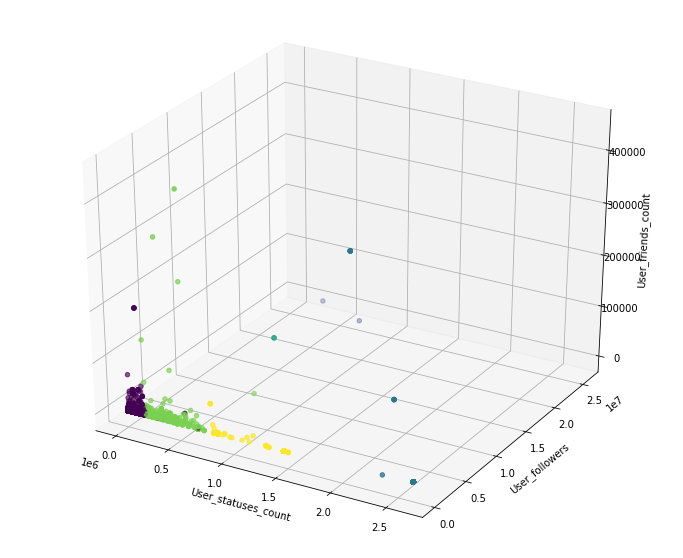

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

threedee = plt.figure(figsize = (12, 10)).gca(projection = '3d')
threedee.scatter(pddf_pred.User_statuses_count, pddf_pred.User_followers, pddf_pred.User_friends_count, c=pddf_pred.cluster)
threedee.set_xlabel('User_statuses_count')
threedee.set_ylabel('User_followers')
threedee.set_zlabel('User_friends_count')
plt.show()

KeyboardInterrupt: ignored

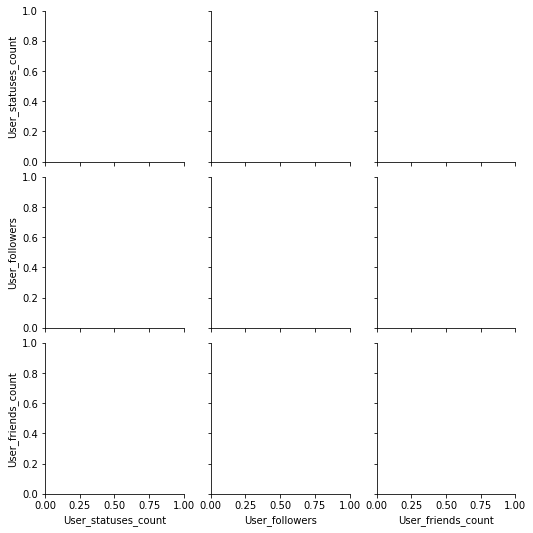

In [ ]:
#k-means clustering graph
import seaborn as sns
cluster_g = sns.pairplot(pddf_pred, hue='cluster')
plt.show()

In [ ]:
spark.stop()